<a href="https://colab.research.google.com/github/revindaamalias/Classification-Image/blob/main/2D_Geometry_Image_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import library
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from google.colab import files, drive

In [2]:
# melakukan dataset split
!pip install split-folders
import splitfolders 
import shutil

In [3]:
# import library tensorflow
!pip install tensorboard
!pip install split-folders tqdm
import splitfolders
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
import zipfile,os
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
print(tf.__version__)

2.5.0


In [4]:
# connect file to google drive

drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
cd /content/drive/MyDrive/2D Geometry Images

/content/drive/MyDrive/2D Geometry Images


In [6]:
# Check the folder
%ls

 Circle/
'Circle_000dfc5c-2a92-11ea-8123-8363a7ec19e6 (1).png'
'Circle_000dfc5c-2a92-11ea-8123-8363a7ec19e6 (2).png'
'Circle_000dfc5c-2a92-11ea-8123-8363a7ec19e6 (3).png'
 Circle_000dfc5c-2a92-11ea-8123-8363a7ec19e6.png
'Circle_00a9ce32-2a8a-11ea-8123-8363a7ec19e6 (1).png'
 Circle_00a9ce32-2a8a-11ea-8123-8363a7ec19e6.png
 Circle_00ad989a-2a9a-11ea-8123-8363a7ec19e6.png
'Circle_00d04b8c-2a91-11ea-8123-8363a7ec19e6 (1).png'
'Circle_00d04b8c-2a91-11ea-8123-8363a7ec19e6 (2).png'
'Circle_00d04b8c-2a91-11ea-8123-8363a7ec19e6 (3).png'
 Circle_00d04b8c-2a91-11ea-8123-8363a7ec19e6.png
 Circle_00f6e2b8-2a84-11ea-8123-8363a7ec19e6.png
'Circle_0a7c44d0-2a99-11ea-8123-8363a7ec19e6 (1).png'
 Circle_0a7c44d0-2a99-11ea-8123-8363a7ec19e6.png
 Circle_0b5b771e-2a84-11ea-8123-8363a7ec19e6.png
 Heptagon/
 Heptagon_0ea1987c-2a8e-11ea-8123-8363a7ec19e6.png
 Heptagon_0edc7bd0-2a94-11ea-8123-8363a7ec19e6.png
'Heptagon_0efb5022-2a90-11ea-8123-8363a7ec19e6 (1).png'
'Heptagon_0efb5022-2a90-11ea-8123-8363a7ec19e6 

In [7]:
# Count the number of classes
dir_Circle = os.path.join('/content/drive/MyDrive/2D Geometry Images/Circle')                          # Definition of directory from Circle
dir_Heptagon = os.path.join('/content/drive/MyDrive/2D Geometry Images/Heptagon')                        # Definition of directory from Heptagon
dir_Triangle = os.path.join('/content/drive/MyDrive/2D Geometry Images/Triangle')                  # Definition of directory from Triangle

print('Training Circle :', len(os.listdir(dir_Circle)))                             # JUMLAH DATASET BERLABEL ROCK
print('Training Heptagon :', len(os.listdir(dir_Heptagon)))                           # JUMLAH DATASET BERLABEL Heptagon
print('Training Triangle :', len(os.listdir(dir_Triangle)))                     # JUMLAH DATASET BERLABEL Triangle

Training Circle : 15
Training Heptagon : 15
Training Triangle : 15


**AUGMENTASI DATA**

In [8]:
#buat direktori train dan val dengan library split_folders 
splitfolders.ratio('/content/drive/MyDrive/2D Geometry Images', output="/content/drive/MyDrive/2D Geometry Images", seed=1337, ratio=(.8, .2)) # default values

base_dir = '/content/drive/MyDrive/2D Geometry Images'
training_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

os.listdir('/content/drive/MyDrive/2D Geometry Images/train')
os.listdir('/content/drive/MyDrive/2D Geometry Images/val')

Copying files: 45 files [00:15,  2.96 files/s]


['Triangle', 'Heptagon', 'Circle']

In [9]:
# direktori data training
train_Circle_dir = os.path.join(training_dir, 'Circle')
train_Heptagon_dir = os.path.join(training_dir, 'Heptagon')
train_Triangle_dir = os.path.join(training_dir, 'Triangle')

# direktori data validasi
validation_Circle_dir = os.path.join(validation_dir, 'Circle')
validation_Heptagon_dir = os.path.join(validation_dir, 'Heptagon')
validation_Triangle_dir = os.path.join(validation_dir, 'Triangle')

In [10]:
# Membuat image data generator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
batch = 3

training_generator = train_datagen.flow_from_directory(
  training_dir,
  target_size=(150,150),
  batch_size=batch,
  class_mode='categorical',
  shuffle=True
)

validation_generator = test_datagen.flow_from_directory(
  validation_dir,
  target_size=(150,150),
  batch_size=batch,
  class_mode='categorical',
  shuffle=True
)

print(validation_generator.class_indices)

Found 36 images belonging to 3 classes.
Found 9 images belonging to 3 classes.
{'Circle': 0, 'Heptagon': 1, 'Triangle': 2}


In [12]:
# Model neural network
model = tf.keras.models.Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(3, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.RMSprop(),
    metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       7

In [24]:
tensorboard_callback = tf.keras.callbacks.TensorBoard()
model.fit(training_generator,
          steps_per_epoch = len(training_generator)//batch,
          epochs = 50,
          validation_data = validation_generator,
          validation_steps = len(validation_generator)//batch,
          verbose = 1, 
          callbacks = [tensorboard_callback]
          )

Epoch 1/50
4/4 [==============================] - 1s 208ms/step - loss: 0.6859 - accuracy: 0.7500 - val_loss: 6.1017 - val_accuracy: 0.0000e+00
Epoch 2/50
4/4 [==============================] - 1s 133ms/step - loss: 0.1750 - accuracy: 1.0000 - val_loss: 0.6809 - val_accuracy: 0.6667
Epoch 3/50
4/4 [==============================] - 1s 151ms/step - loss: 0.8881 - accuracy: 0.6667 - val_loss: 4.5930 - val_accuracy: 0.0000e+00
Epoch 4/50
4/4 [==============================] - 1s 152ms/step - loss: 0.7545 - accuracy: 0.7500 - val_loss: 5.8079 - val_accuracy: 0.3333
Epoch 5/50
4/4 [==============================] - 1s 148ms/step - loss: 0.5932 - accuracy: 0.8333 - val_loss: 8.3147 - val_accuracy: 0.3333
Epoch 6/50
4/4 [==============================] - 1s 154ms/step - loss: 0.2915 - accuracy: 1.0000 - val_loss: 0.6123 - val_accuracy: 0.6667
Epoch 7/50
4/4 [==============================] - 1s 154ms/step - loss: 0.5848 - accuracy: 0.7500 - val_loss: 2.5232 - val_accuracy: 0.3333
Epoch 8/50
4

In [ ]:
# img = image.load_img('hept.png', target_size=(150,150))
# imgplot = plt.imshow(img)

In [ ]:
# x = image.img_to_array(img)
# x = np.expand_dims(x, axis=0)
# images = np.vstack([x])
# classes = model.predict(images, batch_size=3)
# classes.all()

In [ ]:
# y = model.predict(images, batch_size=3)
# print(y)
# print(np.argmax(y), np.max(y) )

Saving Heptagon_0f2e5462-2a87-11ea-8123-8363a7ec19e6.png to Heptagon_0f2e5462-2a87-11ea-8123-8363a7ec19e6.png
Gambar ini berbentuk Heptagon


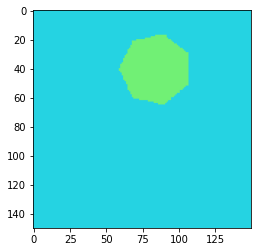

In [27]:
%matplotlib inline

uploaded = files.upload()
for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=9)
  res = np.argmax(classes)

  if res == 0:
    print('Gambar ini berbentuk Circle')
  elif res ==1:
    print('Gambar ini berbentuk Heptagon')
  elif res ==2:
    print('Gambar ini berbentuk Triangle')
  #print(fn)